In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [79]:
data = pd.read_csv('../statsmodels/101regr.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## sklearn deals with matrix not dataframe for the predicators

In [80]:
x = data['SAT']
y = data['GPA']

In [81]:
x.shape

(84,)

In [82]:
y.shape

(84,)

* since x is one dimensional array, we need to reshape it into a matrix

In [83]:
# x_matrix = x.values.reshape(84, 1)
x_matrix = x.values.reshape(-1, 1)
x_matrix.shape

(84, 1)

In [84]:
# create an object of class LinearRegression
reg = LinearRegression()

In [85]:
reg.fit(x_matrix, y)
print(reg.coef_)
print(reg.score(x_matrix, y))


[0.00165569]
0.40600391479679754


In [86]:
#fitmodel = reg.fit(data[['SAT']], data[['GPA']])

## R-squared

In [87]:
reg.score(x_matrix, y)

0.40600391479679754

## Coeffiecients & Intercept

In [88]:
print(reg.coef_)
print(reg.intercept_)

[0.00165569]
0.2750402996602799


## making predictions

In [89]:
reg.predict([[1740]])

array([3.15593751])

In [90]:
new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [91]:
reg.predict(new_data)

/usr/local/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [92]:
reg.predict(new_data.values)

array([3.15593751, 3.18905127])

In [93]:
new_data['Predicted_GPA'] = reg.predict(new_data.values)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


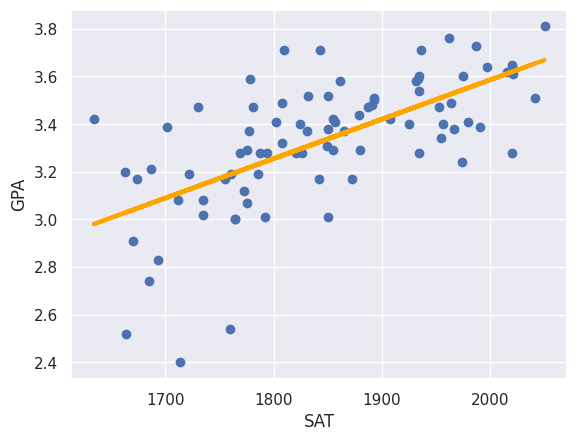

In [105]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
# yhat = 0.0017*x + 0.275
fig = plt.plot(x, yhat, color='orange', lw='3', label='Regression Line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()